15.077/IDS.147 Problem Set 4 (Python Version) <br>
**Name:** Chun-Hei Lam. **ID:** 928931321 <br>
**Declaration:** I pledge that the work submitted for this coursework is my own unassisted work unless stated otherwise. <br>
**Acknowledgement to:** Harry Yu

In [93]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import itertools

# Rice 12.29 Semiconductor

The performance of a semiconductor depends upon the thickness of a layer of silicon dioxide. In an experiment (Czitrom and Reece, 1997), layer thicknesses were measured at three furnace locations for three types of wafers (virgin wafers, recycled in-house wafers, and recycled wafers from an external source). The data are contained in the file `waferlayers`.

In [20]:
Waferlayers = pd.read_csv("waferlayers.txt", quotechar="'")
Waferlayers = Waferlayers.rename(columns={"Wafer Type": "WaferType"})

Conduct a two-way analysis of variance and test for significance of main effects and interactions.

*Solution: We first fit the ANOVA model.*

In [23]:
model = sm.formula.ols('Thickness ~ C(Furnace) + C(WaferType) + C(Furnace):C(WaferType)', data=Waferlayers).fit()

*We then look at the estimated parameters:*

In [29]:
model.params

Intercept                                   91.966667
C(Furnace)[T.2]                             -3.333333
C(Furnace)[T.3]                             -1.600000
C(WaferType)[T.In-House]                    -2.033333
C(WaferType)[T.Virgin]                      -1.900000
C(Furnace)[T.2]:C(WaferType)[T.In-House]     4.633333
C(Furnace)[T.3]:C(WaferType)[T.In-House]     2.200000
C(Furnace)[T.2]:C(WaferType)[T.Virgin]       3.333333
C(Furnace)[T.3]:C(WaferType)[T.Virgin]      -0.166667
dtype: float64

*Note: The base case is `Furnace = 1, WaferType = External`. The coefficient `C(Furnace)[T.2]` refers to effect of `Furnace = 2`, while the coefficient `C(Furnace)[T.3]:C(WaferType)[T.Virgin]` refers to joint effect of `Furnace = 3` and `WaferType = 'Virgin'`, so on and so forth.*

*We then perform F-test for main effects and interactions.*

In [24]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Furnace),4.108889,2.0,1.446038,0.261588
C(WaferType),5.875556,2.0,2.067779,0.155467
C(Furnace):C(WaferType),21.348889,4.0,3.756648,0.021618
Residual,25.573333,18.0,NaN,NaN


*If we use $\alpha = 0.05$, then we have the following*

|$H_0$|$H_1$|Result|
|:-|:-|:-|
|`Furnance` has no effect.|`Furnance` has effect.|Insufficient evidence to reject $H_0$.|
|`WaferType` has no effect.|`WaferType` has effect.|Insufficient evidence to reject $H_0$.|
|Interaction of `Furnance` and `WaferType` has no effect.|Interaction of `Furnance` and `WaferType` has effect.|Sufficient evidence to reject $H_0$.|

Only interaction of `Furnance` and `WaferType` has significant effect.

Construct a graph such as that shown in Figure 12.3 of textbook. Does the comparison of layer thicknesses depend on furnace location?

*Solution: We plot `Thickness` vs. `Furnace`.*

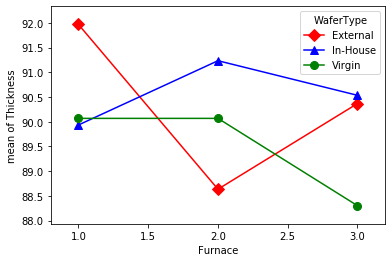

In [44]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(Waferlayers.Furnace, Waferlayers.WaferType, Waferlayers.Thickness, 
                       colors=['red','blue','green'], markers=['D','^','o'], ms=8)

*As we can see the line segments are not parallel to each other. If average thickness depends on solely `Furnace` then we expect the line segments to be not horizontal and parallel to each other. The line segments are indeed not horizontal, but are not parallel to each other as well. Therefore there are interaction between `Furnace` and `WaferType`, and the layer thickness depends more on the interaction.*

# Adhesive Process
An experiment was conducted using an unreplicated $2^4$ factorial design to determine the effects of the amount of glue `x1`, predrying temperature `x2`, tunnel temperature `x3`, and pressure `x4` on the adhesiveforce obtained in an adhesive process.

In [4]:
Adhesive = pd.read_csv("Adhesive.csv")

**Part (a):** Estimate all the main effects and interactions.

*Solution: the following tabulates all effects and interactions of variables.*

In [5]:
model = sm.formula.ols('y ~ (x1+x2+x3+x4)**4', data=Adhesive).fit()
model.params

Intercept      4.301875
x1             0.311875
x2             0.543125
x3             0.345625
x4            -0.096875
x1:x2         -0.004375
x1:x3          0.160625
x1:x4         -0.049375
x2:x3          0.149375
x2:x4          0.374375
x3:x4          0.014375
x1:x2:x3      -0.138125
x1:x2:x4      -0.010625
x1:x3:x4       0.196875
x2:x3:x4      -0.021875
x1:x2:x3:x4   -0.016875
dtype: float64

**Part (b):** Plot the estimated effects on a normal probability plot.

In [6]:
fit_val = model.params.sort_values().values[:len(model.params)-1]
name = model.params.sort_values()._index[:len(model.params)-1]

In [7]:
mu, std = stats.norm.fit(fit_val, floc=0)
osm, osr = stats.probplot(fit_val, dist=stats.norm(loc=0, scale=std))

Text(0, 0.5, 'Sample Quantiles')

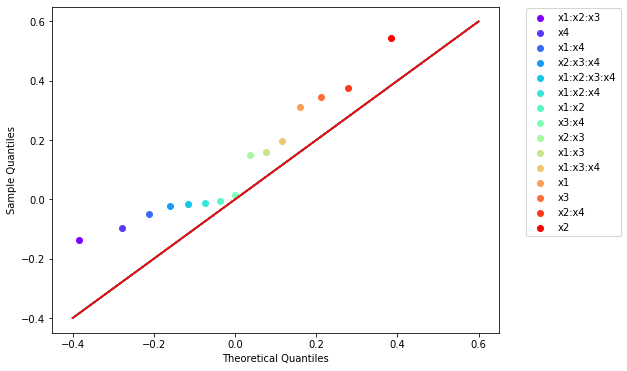

In [51]:
colors = cm.rainbow(np.linspace(0, 1, len(fit_val)))
xvec = np.linspace(-0.4, 0.6, 2)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
# ax.scatter(osm[0], osm[1])

for x,y,c,txt in zip(osm[0], osm[1], colors, name):
    ax.scatter(x, y, color=c, label=txt)
    ax.plot(xvec, xvec)
    # ax.annotate(txt, (x,y))

ax.plot(xvec,xvec,color="red")
ax.legend(bbox_to_anchor=(1.05, 1.01), loc='upper left')
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

**Part (c):** Interpret your results.

*Solution: As we can see from the figure, most of the points are far from the line `x=x`. The points there are closed to `x=x` corresponds to the factors which are not significant, which are `x1:x2` and `x3:x4` in our case.*

# Plutonium
A $2^{8-4}_{\text{IV}}$ fractional factorial design was run to identify sources of plutonium contamination in the radioactivity material analysis of dried shellfish at the National Institute of Standards and Technology (NIST). The data are in the table below. No contamination occurred at runs 1,4, and 9.

In [2]:
Plutonium = pd.read_csv("Plutonium.csv")

The factors and levels are shown in the following table.

| Factor | Code | -1 | +1 |
| :- | :- | :- | :- |
| Glassware | `x1` |Distilled Water | Soap, acid, stored |
| Reagent | `x2` | New | Old |
| Sample Prep | `x3` | Co-precipitation | Electrodeposition |
| Tracer | `x4` | Stock | Fresh |
| Dissolution | `x5` | Without | With |
| Hood | `x6` | B | A |
| Chemistry | `x7` | Without | With |
| Ashing | `x8` | Without | With |

**Part (a):** Write down the alias relationships.

*Solution:* We first identify the 4 design generators in our experiment. From observation we have the generators: `x5=x2*x3*x4`, `x6=x1*x3*x4`, `x7=x1*x2*x3` and `x8=x1*x2*x4`. We may check by looking at the columns.

In [3]:
print((all(Plutonium["x5"] == Plutonium["x2"] * Plutonium["x3"] * Plutonium["x4"]), 
    all(Plutonium["x6"] == Plutonium["x1"] * Plutonium["x3"] * Plutonium["x4"]),
    all(Plutonium["x7"] == Plutonium["x1"] * Plutonium["x2"] * Plutonium["x3"]),
    all(Plutonium["x8"] == Plutonium["x1"] * Plutonium["x2"] * Plutonium["x4"])))

(True, True, True, True)


We then write the generators in standard form: `I = x2*x3*x4*x5 = x1*x3*x4*x6 = x1*x2*x3*x7 = x1*x2*x4*x8`.

Finally, we may multiply the generators by other effects to give a complete list of aliasing effects.

In [140]:
design = Plutonium.drop(columns=["Run","y"])
design2 = design.copy() * -1
design2.iloc[:,-4:] = 1
design2_copy = np.array(list(itertools.repeat(design2.values, 16))).reshape((-1,8))
ortho = pd.DataFrame(design2_copy, columns=design2.columns, 
                     index=pd.MultiIndex.from_product([design.index, np.arange(16)], names=["X","Y"]))

In [141]:
prod = design.mul(ortho, level="X")

In [160]:
equiv_class = prod.apply(lambda row: f"({((row == 1)*row.index.str[1]).sum()})", axis = 1)
equiv_class.iloc[0] = "(I)"
equiv_class = equiv_class.groupby("Y").apply("=".join)
print("\n".join(equiv_class))

(I)=(1678)=(2578)=(1256)=(3567)=(1358)=(2368)=(1237)=(4568)=(1457)=(2467)=(1248)=(3478)=(1346)=(2345)=(12345678)
(1)=(678)=(12578)=(256)=(13567)=(358)=(12368)=(237)=(14568)=(457)=(12467)=(248)=(13478)=(346)=(12345)=(2345678)
(2)=(12678)=(578)=(156)=(23567)=(12358)=(368)=(137)=(24568)=(12457)=(467)=(148)=(23478)=(12346)=(345)=(1345678)
(12)=(2678)=(1578)=(56)=(123567)=(2358)=(1368)=(37)=(124568)=(2457)=(1467)=(48)=(123478)=(2346)=(1345)=(345678)
(3)=(13678)=(23578)=(12356)=(567)=(158)=(268)=(127)=(34568)=(13457)=(23467)=(12348)=(478)=(146)=(245)=(1245678)
(13)=(3678)=(123578)=(2356)=(1567)=(58)=(1268)=(27)=(134568)=(3457)=(123467)=(2348)=(1478)=(46)=(1245)=(245678)
(23)=(123678)=(3578)=(1356)=(2567)=(1258)=(68)=(17)=(234568)=(123457)=(3467)=(1348)=(2478)=(1246)=(45)=(145678)
(123)=(23678)=(13578)=(356)=(12567)=(258)=(168)=(7)=(1234568)=(23457)=(13467)=(348)=(12478)=(246)=(145)=(45678)
(4)=(14678)=(24578)=(12456)=(34567)=(13458)=(23468)=(12347)=(568)=(157)=(267)=(128)=(378)=(136)=(235)=(

**Part (b):** Estimate the main effects.

In [9]:
model = sm.formula.ols('y ~ x1+x2+x3+x4+x5+x6+x7+x8+x1*x2+x1*x3+x1*x4+x1*x5+x1*x6+x1*x7+x1*x8', data=Plutonium).fit()
model.params

Intercept    0.778556
x1           0.724856
x2          -0.431181
x3           0.301694
x4           0.325931
x5          -0.402619
x6           0.693194
x7           0.029556
x8          -0.006431
x1:x2       -0.435406
x1:x3        0.290569
x1:x4        0.309306
x1:x5       -0.378294
x1:x6        0.685894
x1:x7       -0.008794
x1:x8       -0.006831
dtype: float64

**Part (c):** Prepare a normal probability plot for the effects and interpret the results.

Text(0, 0.5, 'Sample Quantiles')

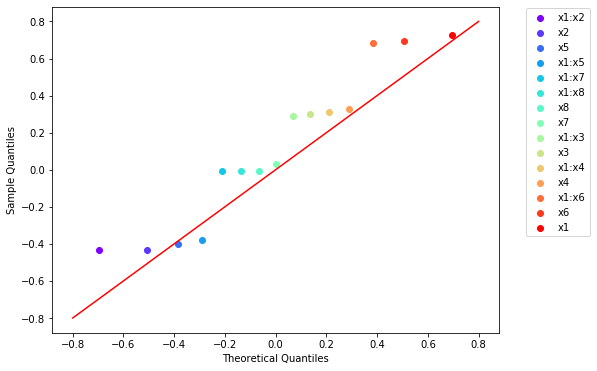

In [26]:
fit_val = model.params.sort_values().values[:len(model.params)-1]
name = model.params.sort_values()._index[:len(model.params)-1]
mu, std = stats.norm.fit(fit_val, floc=0)
osm, osr = stats.probplot(fit_val, dist=stats.norm(loc=0, scale=std))
colors = cm.rainbow(np.linspace(0, 1, len(fit_val)))
xvec = np.linspace(-0.8, 0.8, 2)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
# ax.scatter(osm[0], osm[1])

for x,y,c,txt in zip(osm[0], osm[1], colors, name):
    ax.scatter(x, y, color=c, label=txt)
    # ax.annotate(txt, (x,y))

ax.plot(xvec,xvec,color="red")
ax.legend(bbox_to_anchor=(1.05, 1.01), loc='upper left')
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

*Comment: The outliers seems to be `x1:x2`, `x1:x7`, `x1:x3`, `x1:x6`. One thing worth noticing is that the data $y$ itself is not normal - it is dominated by some outliers above 1. That might be the reason why the estimated effects are "grouped" together. To conclude, we should have applied variance-stablising transformations to the response before analysing our data...*

Text(0, 0.5, 'Frequencies')

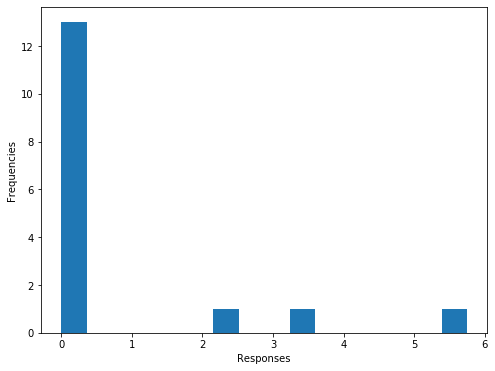

In [174]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,6))
Plutonium["y"].hist(bins=16, grid=False, ax=ax)
ax.set_xlabel("Responses")
ax.set_ylabel("Frequencies")

# Inorganic Impurities

This dataset is from an experiment to investigate inorganic impurities (ash) in paper. Two variables, temperature $T$ in degree Celsius and time $t$ in hours, were studied. The coded predictor variables shown in the following table are
\begin{equation}
x_1 = \frac{T-775}{115}, \quad x_2 = \frac{t-3}{1.5}
\end{equation}
and the response $y$ is impurity percentage times $10^3$.

In [59]:
Impurities = pd.read_csv("Impurities.csv")

In [60]:
Impurities

,x1,x2,y
0,-1.0,-1.0,211
1,1.0,-1.0,92
2,-1.0,1.0,216
3,1.0,1.0,99
4,-1.5,0.0,222
5,1.5,0.0,48
6,0.0,-1.5,168
7,0.0,1.5,179
8,0.0,0.0,122
9,0.0,0.0,175


**Part (a)** What type of design has been used in the study? Can the design be rotated.

*Solution: this is a Box-Wilson Central Composite Design. The design cannot be rotated.*

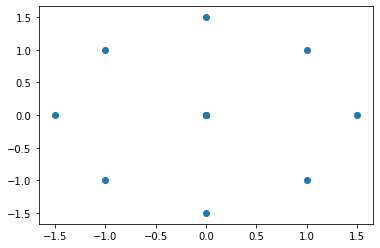

In [72]:
plt.scatter(Impurities["x1"], Impurities["x2"])

**Part (b)** Fit a quadratic model to the data. Is this model satisfactory?

In [61]:
model = sm.formula.ols('y ~ x1+x2+x1**2+x2**2+x1*x2', data=Impurities).fit()
model.summary()

C:\Users\godin\anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     25.83
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           0.000182
Time:                        01:12:40   Log-Likelihood:                -50.177
No. Observations:                  12   AIC:                             108.4
Df Residuals:                       8   BIC:                             110.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.9167      5.600     27.307      0.000     140.003     165.830
x1           -58.4706      6.654     -8.788      0.000     -73.814     -43.127
x2             3.3529      6.654      0.504      0.628     -11.991      18.696
x1:x2          0.5000      9.699      0.052      0.960     -21.867      22.867
==============================================================================
Omnibus:                        0.298   Durbin-Watson:                   2.567
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.410
Skew:                          -0.275   Prob(JB):                        0.815
Kurtosis:                       2.280   Cond. No.                         1.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*I am not happy with the model, because the quadratic model is useless (look at the extremely high t values).*

**Part (c)** If it is important to minimise the ash value, where would you run the process?

*We would run the process at the place with highest temperature.*

# Copper Manufacturing
The copper content of a manufacturing process is measured three times per day and the results are reportedas parts per million.  The values for 25 days are given in the table below.

In [64]:
Copper = pd.read_csv("Copper.csv")

**Part (a)** Using all the data, find trial control limits for $\bar{X}$ and $R$ charts, construct the chart, and plot the data. Is the process in statistical control.

*Solution: we first obtain the mean and range of each observation.*

In [177]:
Copper["Omean"] = Copper[["O1","O2","O3"]].mean(axis=1)
Copper["Range"] = Copper[["O1","O2","O3"]].max(axis=1) - Copper[["O1","O2","O3"]].min(axis=1)

*We then write a function which input vector of mean `mean_vec` and vector of ranges `range_vec` and return limits for $\bar{X}$ and $R$ charts as well as actual control chart.*

In [186]:
np.array([1,2,3,4,5]).mean()

3.0

In [204]:
def XbarRchart(mean_vec, range_vec, Xbar_plot=None, R_plot=None): # input array of mean and range
    
    # Grand Mean and Grand Range
    grand_mean = mean_vec.mean(); mean_range = range_vec.mean()
    
    # Hard Code the multipliers for now
    n = 3; A2 = 1.023; D3 = 0; D4 = 2.575;
    
    # Obtain the control limits in control charts.
    Xbar_UCL = grand_mu + A2*mean_range; Xbar_LCL = grand_mu - A2*mean_range
    R_UCL = D4*mean_range; R_LCL = D3*mean_range
    
    # Return Xbar plot.
    if Xbar_plot is not None:
        Xbar_plot.plot(mean_vec)
        Xbar_plot.axhline(y=Xbar_UCL, color='r', linestyle='-')
        Xbar_plot.axhline(y=Xbar_LCL, color='r', linestyle='-')
        Xbar_plot.axhline(y=grand_mu, color='b', linestyle='-')
        Xbar_plot.set_xlabel('Run')
        Xbar_plot.set_ylabel('Mean of Observation')
        Xbar_plot.set_title(f'Xbar Chart (mean = {np.round(grand_mean,3)}, limits = ({np.round(Xbar_LCL, 3)}, {np.round(Xbar_UCL, 3)}))')

    # Return R plot.
    if R_plot is not None:
        R_plot.plot(range_vec)
        R_plot.axhline(y=R_UCL, color='r', linestyle='-')
        R_plot.axhline(y=R_LCL, color='r', linestyle='-')
        R_plot.axhline(y=mean_range, color='b', linestyle='-')
        R_plot.set_xlabel('Run')
        R_plot.set_ylabel('Range of Observation')
        R_plot.set_title(f'Xbar Chart (mean = {np.round(mean_range,3)}, limits = ({np.round(R_LCL, 3)}, {np.round(R_UCL, 3)})')
    
    result = dict()
    result["grand_mean"] = grand_mean
    result["mean_range"] = mean_range
    result["Xbar_lim"] = (Xbar_LCL, Xbar_UCL)
    result["R_lim"] = (R_LCL, R_UCL)
    
    return result

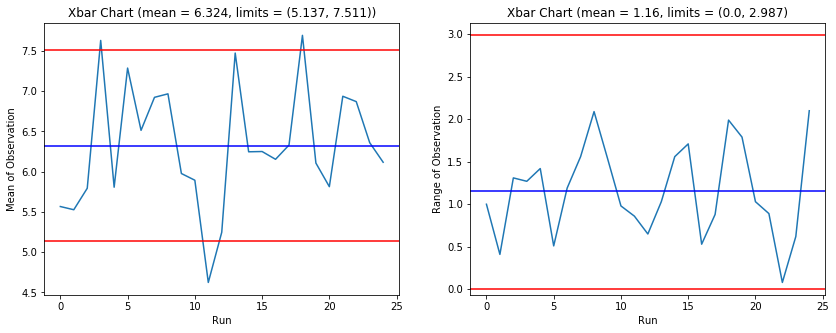

In [205]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
result = XbarRchart(Copper["Omean"], Copper["Range"], Xbar_plot=ax1, R_plot=ax2)

*All the ranges in $R$ charts falls in between the control limits, so we can assume the process has constant variations. We can see that there are points in $\bar{X}$ beyond the control limits, so the process is statistically out-of-control.*

**Part (b)** If necessary, revise the control limits computed in part (a), assuming any samples that plot outside the control limits can be eliminated. Continue to eliminate points outside the control limits and revise, until all points plot between control limits.

*Solution: we repeatedly filter out the points and revise control limits. Here I do not use while loop since we should be able to make all points fall into control limit within two iterations.*

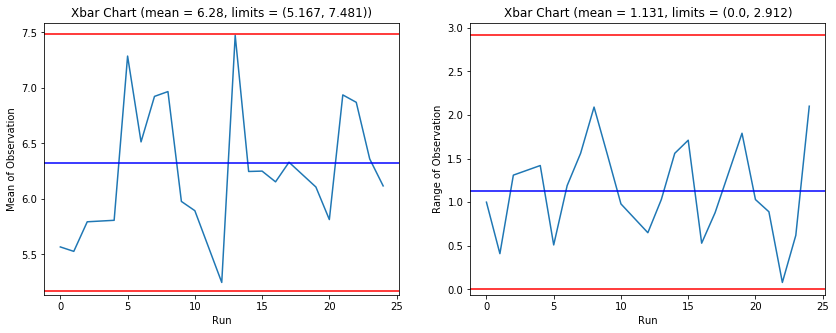

In [212]:
filtered = Copper[(Copper.Omean < result["Xbar_lim"][1]) & (Copper.Omean > result["Xbar_lim"][0])]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
result2 = XbarRchart(filtered["Omean"], filtered["Range"], Xbar_plot=ax1, R_plot=ax2)

*Turns out one iteration is enough - we can check if all points fall in between the control limits.*

In [213]:
all(filtered == filtered[(filtered.Omean < result2["Xbar_lim"][1]) & (filtered.Omean > result2["Xbar_lim"][0])])

True

**Part (c)** Given that the specifications are at $6.0 \pm 0.5$, estimate $C_p$ and $C_{pk}$ for the in-control process and interpret these ratios.

In [217]:
USL = 6.5; LSL = 5.5; d2 = 1.693;
mu = result2["grand_mean"]; sigma_hat = result2["mean_range"] / d2
Cp = (USL - LSL) / (6 * sigma_hat)
Cpk = min((USL-mu), (mu-LSL)) / (3 * sigma_hat)
print(f"Cp = {np.round(Cp,5)}, Cpk = {np.round(Cpk,5)}")

Cp = 0.2495, Cpk = 0.10986


*Comment: both `Cp` and `Cpk` are very small, so it is not capable of producing acceptable product. Under normal assumption, the average probability of making no mistake is approximately:*

In [222]:
1 - 2*(1 - stats.norm.cdf(3*Cp))

0.5458491299027748